# Transfer Learning

In [1]:
import matplotlib.pyplot as plt

#file = 'results.accuracy.results_tfv1.1.1_C_2.0.csv'
#file = 'results.accuracy.results_tfv1.1.2_C_2.0.csv'
#file = 'results.accuracy.results_tfv1.2.1_C_2.0.csv'
#file = 'results.accuracy.results_tfv1.2.2_C_2.0.csv'
#file = 'results.accuracy.results_tfv2.1.1_C_2.0.csv'
#file = 'results.accuracy.results_tfv2.1.2_C_2.0.csv'
#file = 'results.accuracy.results_tfv2.2.1_C_1.0.csv'
#file = 'results.accuracy.results_tfv2.2.1_C_2.0.csv'
file = 'results.accuracy.results_tfv2.2.1_C_3.0.csv'
#file = 'results.accuracy.results_tfv2.2.2_C_3.0.csv'
#file = 'results.accuracy.results_tfv3.1.1_C_2.0.csv'
#file = 'results.accuracy.results_tfv3.1.2_C_2.0.csv'
#file = 'results.accuracy.results_tfv3.2.1_C_2.0.csv'
#file = 'results.accuracy.results_tfv3.2.2_C_2.0.csv'

model_names = list()
model_accuracys = list()
with open(file) as f:
    for line in f:
        tokens = line.split(',')
        #results.append((tokens[0],tokens[1],tokens[2]))
        model_names.append(tokens[0])
        model_accuracys.append(tokens[1].rstrip())

model_vocabulary_lens = list()
for model in model_names:
    with open('./llda_train_input/'+model+'_features.dat') as f:
        line = f.readline()
        model_vocabulary_lens.append(len(line.split()))

results = zip(model_names, model_accuracys, model_vocabulary_lens)
results_tr = list()
results_2 = list()
results_full = list()
results_full_e_00002 = list()
results_full_e_00010 = list()
results_full_e_00200 = list()

for model, accuracy, vlen in results:
    if '_tr' in model:
        results_tr.append((model,accuracy,vlen))
    elif '_2' in model:
        results_2.append((model,accuracy,vlen))
    elif model.endswith('_full'):
        results_full.append((model,accuracy,vlen))
    elif '_full_expanded_00002' in model:
        results_full_e_00002.append((model,accuracy,vlen))
    elif '_full_expanded_00010' in model:
        results_full_e_00010.append((model,accuracy,vlen))
    elif '_full_expanded_00200' in model:
        results_full_e_00200.append((model,accuracy,vlen))

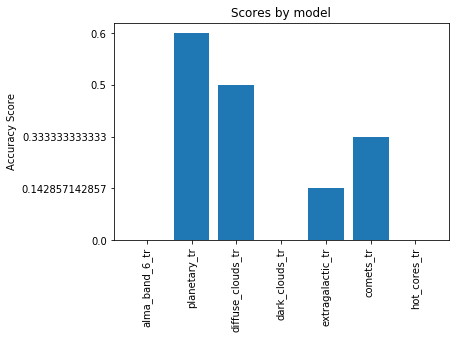

In [2]:
plt.close('all')
res = results_tr
res = sorted(res,key=lambda x: x[2])

x = range(len(res))
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.show()

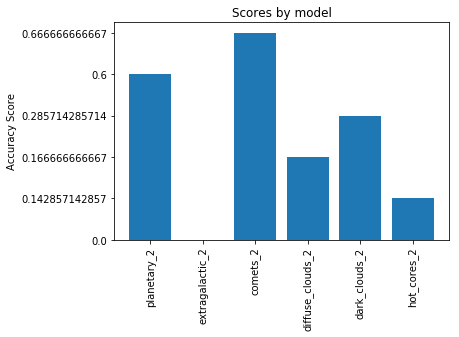

In [3]:
plt.close('all')
res = results_2
res = sorted(res,key=lambda x: x[2])

x = range(len(res))
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.show()

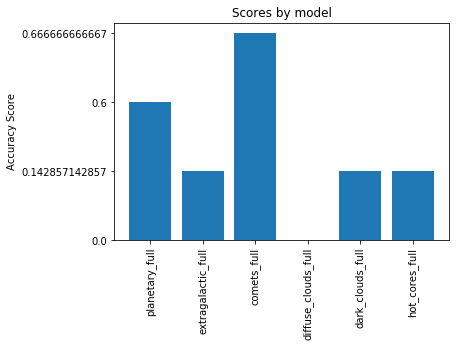

In [4]:
plt.close('all')
res = results_full
res = sorted(res,key=lambda x: x[2])

x = range(len(res))
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.show()

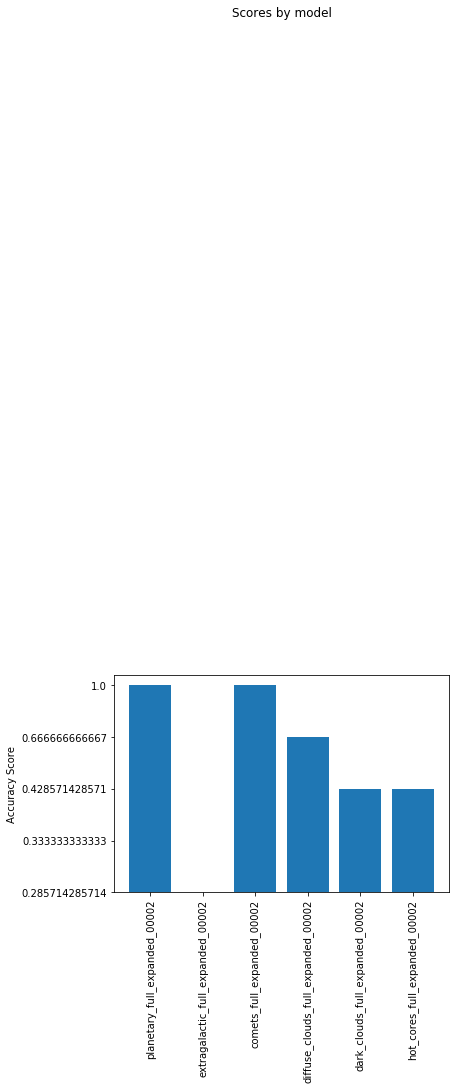

In [5]:
plt.close('all')
res = results_full_e_00002
res = sorted(res,key=lambda x: x[2])

x = range(len(res))
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.show()

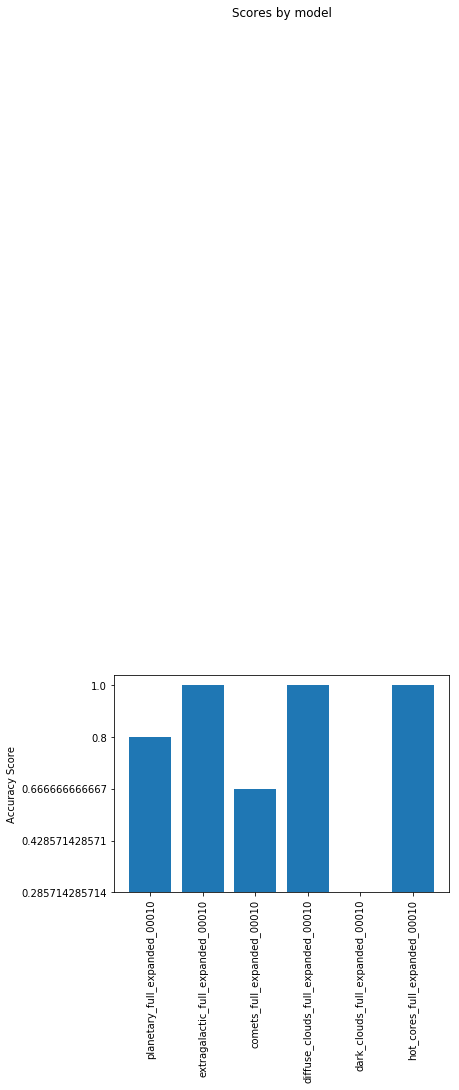

In [6]:
plt.close('all')
res = results_full_e_00010
res = sorted(res,key=lambda x: x[2])

x = range(len(res))
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.show()

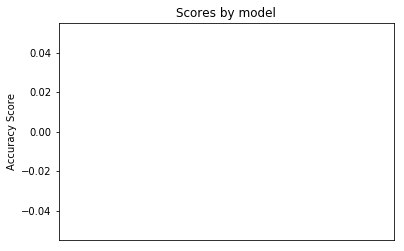

In [7]:
plt.close('all')
res = results_full_e_00200
res = sorted(res,key=lambda x: x[2])

x = range(len(res))
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.show()